In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
data = pd.read_csv('weatherHistory.csv')
data.head(2)

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.


### Preprocesssing data

In [3]:
data['Formatted Date'] = pd.to_datetime(data['Formatted Date'], utc=True)
data['Year'] = data['Formatted Date'].map(lambda date : date.year)
data.head(2)

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary,Year
0,2006-03-31 22:00:00+00:00,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.,2006
1,2006-03-31 23:00:00+00:00,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.,2006


In [4]:
# covnert date to day of year

data['Day of Year'] = data['Formatted Date'].dt.dayofyear
data['Day of Year'].head(2)

0    90
1    90
Name: Day of Year, dtype: int64

In [5]:
# mean of temperature in each day

mean_day_temperature = data.groupby(['Day of Year', 'Year'])['Temperature (C)'].mean().reset_index()
mean_day_temperature.head()

,Day of Year,Year,Temperature (C)
0,1,2006,4.075000
1,1,2007,3.806713
2,1,2008,-5.663194
3,1,2009,-4.850926
4,1,2010,7.807407


Text(0, 0.5, 'Temperature (C)')

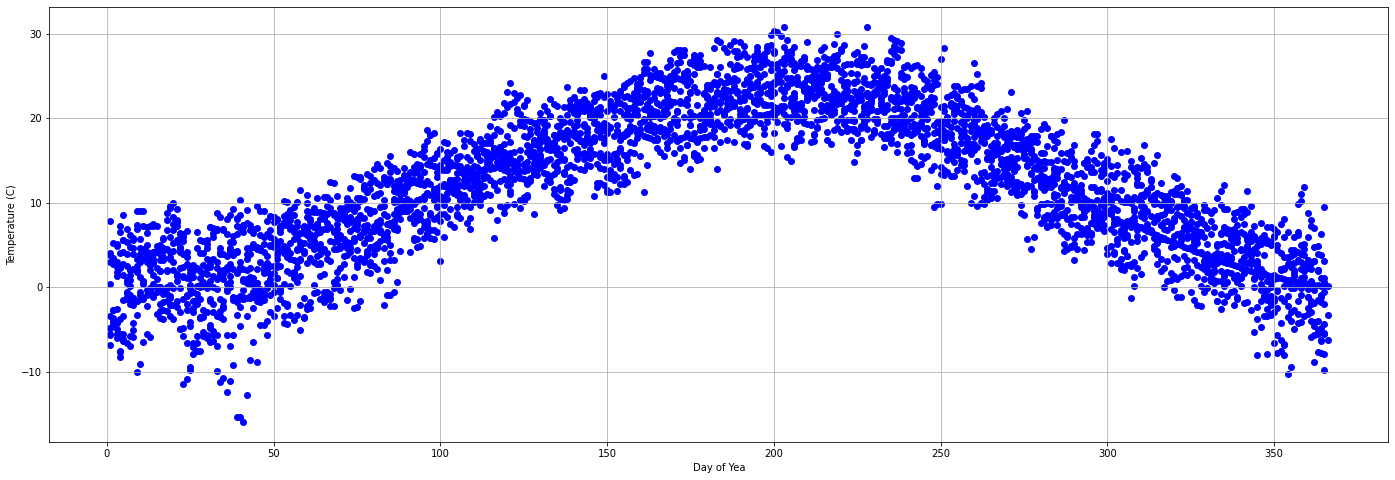

In [6]:
X = mean_day_temperature['Day of Year'].to_numpy()
Y = mean_day_temperature['Temperature (C)'].to_numpy()

plt.figure(figsize = (24, 8))
plt.scatter(X, Y, marker = '.', linewidths = 4, c = 'b')
plt.grid()
plt.xlabel('Day of Yea')
plt.ylabel('Temperature (C)')

### Perceptron class, fit, predict and evaluation

In [7]:
# train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)
print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

(3215,) (804,) (3215,) (804,)


In [8]:
class Perceptron:
    def __init__(self):
        pass
    
    def fit(self, itr, X_tarin, Y_tarin):
        self.w = np.random.rand(1)
        self.b = np.random.rand(1)
        lr = 0.000001
        MAE = []
        MSE = []

        for i in range(itr):
            mae = []
            mse = []

            for i in range(X_train.shape[0]):
                x_train = X_train[i].reshape(1,-1)
                y_pred = np.matmul(x_train, self.w ) + self.b

                e = Y_train[i] - y_pred
                
                self.w = self.w  + e * lr * X_train[i]
                self.b = self.b + e * lr * 1
         
                mae.append(np.abs(e))
                mse.append(np.square(e))

            MAE.append(np.mean(mae))
            MSE.append(np.mean(mse))
        
        np.save('w', self.w)
        np.save('b', self.b)
        return MAE, MSE

    def predict(self, X_test):
        w = np.load('w.npy')
        b = np.load('b.npy')
        y_pred = np.matmul(X_test, w) + b

        return y_pred

    def evaluate(self, X_test, Y_test, metric):
        w = np.load('w.npy')
        b = np.load('b.npy')
        Y_pred = np.matmul(X_test, w) + b
        
        if metric == 'MAE':
            absolute_error = np.abs(Y_pred - Y_test)
            evaluation = np.mean(absolute_error)
            
        if metric == 'MSE':
            squared_error = (Y_pred - Y_test) ** 2
            evaluation = np.mean(squared_error)
                                 
        return evaluation

In [9]:
# train

itration = 5
model = Perceptron()
MAE, MSE = model.fit(itration, X_train, Y_train)
print('MAE in end of train: ', np.min(MAE), '\nMSE in end of train:', np.min(MSE))

MAE in end of train:  8.366630363279707 
MSE in end of train: 99.92483127780785


Text(0.5, 1.0, 'MAE during Training')

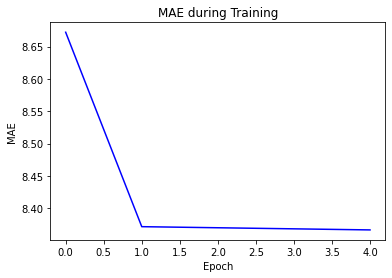

In [10]:
plt.plot((np.arange(len(MAE))), MAE, c = 'b')
plt.xlabel('Epoch')
plt.ylabel('MAE')
plt.title('MAE during Training')

Text(0.5, 1.0, 'MSE during Training')

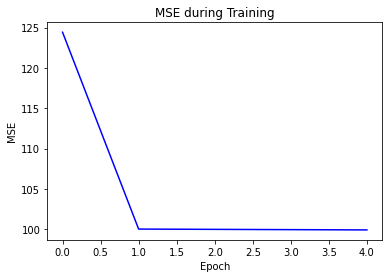

In [11]:
plt.plot(MSE, c = 'b')
plt.xlabel('Epoch')
plt.ylabel('MSE')
plt.title('MSE during Training')

Text(0, 0.5, 'Temperature (C)')

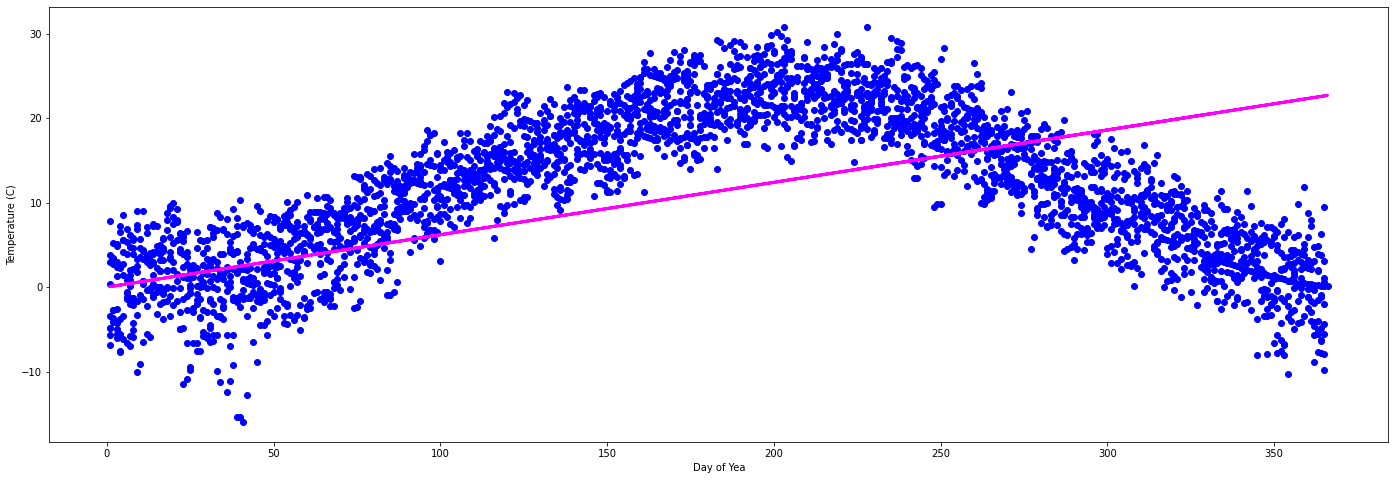

In [12]:
X_train = X_train.reshape(-1,1)
y_pred = np.matmul(X_train, model.w)

plt.figure(figsize = (24, 8))
plt.scatter(X_train, Y_train, c='blue')
plt.plot(X_train, y_pred, c='magenta', lw=3)
plt.xlabel('Day of Yea')
plt.ylabel('Temperature (C)')

In [13]:
# evaluate

X_test = X_test.reshape(-1,1)
Y_test = Y_test.reshape(-1,1)

evaluate = model.evaluate(X_test, Y_test, metric = 'MSE')
print('MSE on X_test :', evaluate)
evaluate = model.evaluate(X_test, Y_test, metric = 'MAE')
print('MAE on X_test :', evaluate)

MSE on X_test : 118.17171728456789
MAE on X_test : 8.868934813471562


In [14]:
# Predict

day = 150
y_pred = model.predict(np.array([day]))
y_pred = np.round(y_pred, 1)
print('predicted temperature on {} day of year :'.format(day), y_pred[0])

y_pred = model.predict(X_test)

predicted temperature on 150 day of year : 9.7
